In [9]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [55]:
# assume some unit guassian 10-D input data
D = np.random.randn(1000, 500)
hidden_layer_sizes = [500] * 10
nonlinearities = ['tanh'] * len(hidden_layer_sizes)

In [56]:
act = {'relu':lambda x:np.maximum(0, x), 'tanh':lambda x:np.tanh(x), 'sigmoid':lambda x:1/(1+np.exp(-x))}
Hs = {}
for i in range(len(hidden_layer_sizes)):
    X = D if i == 0 else Hs[i-1] # input at this layer
    fan_in = X.shape[1]
    fan_out = hidden_layer_sizes[i]
    W = np.random.randn(fan_in, fan_out) / np.sqrt(fan_in) # layer initialization
    
    H = np.dot(X, W) # matrix multiply
    H = act[nonlinearities[i]](H)
    Hs[i] = H # cache result on this layer

In [57]:
# look at distributions at each layer
print('input layer had mean %f and std %f' % (np.mean(D), np.std(D)))
layer_means = [np.mean(H) for i,H in Hs.items()]
layer_stds = [np.std(H) for i,H in Hs.items()]
for i,H in Hs.items():
    print('hidden layer %d had mean %f and std %f' % (i+1, layer_means[i], layer_stds[i]))

input layer had mean 0.000119 and std 0.999192
hidden layer 1 had mean 0.000550 and std 0.626832
hidden layer 2 had mean 0.000293 and std 0.484821
hidden layer 3 had mean 0.000150 and std 0.405665
hidden layer 4 had mean 0.000181 and std 0.355154
hidden layer 5 had mean 0.000251 and std 0.320223
hidden layer 6 had mean 0.000113 and std 0.294171
hidden layer 7 had mean -0.000081 and std 0.272632
hidden layer 8 had mean -0.000223 and std 0.253785
hidden layer 9 had mean 0.000521 and std 0.238648
hidden layer 10 had mean -0.000368 and std 0.225783


Text(0.5, 1.0, 'layer std')

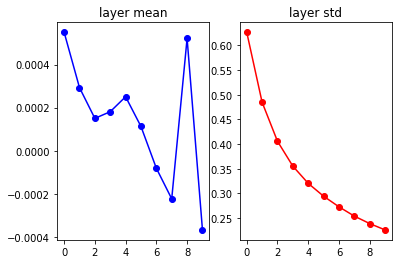

In [58]:
# plot the means and standard deviations
plt.figure()
plt.subplot(121)
plt.plot(Hs.keys(), layer_means, 'ob-')
plt.title('layer mean')
plt.subplot(122)
plt.plot(Hs.keys(), layer_stds, 'or-')
plt.title('layer std')

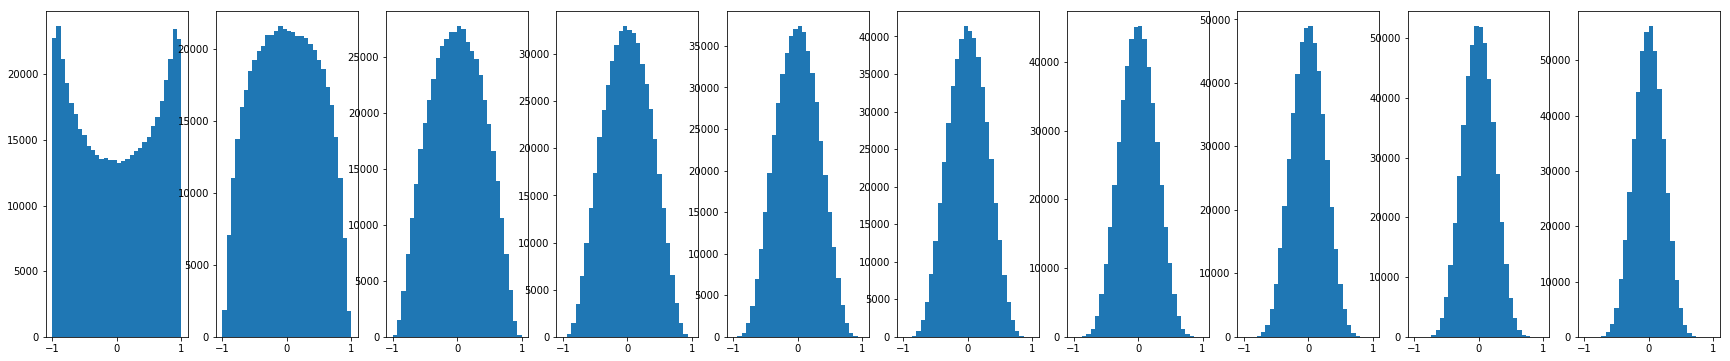

In [59]:
# plot the raw distributions
plt.figure(figsize=(30, 6))
for i,H in Hs.items():
    plt.subplot(1, len(Hs), i+1)
    plt.hist(H.ravel(), 30, range=(-1,1))